In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import pandas as pd

# Read the CSV file and specify that the delimiter is a comma (',')
data = pd.read_csv('u_matrix_with_time_columns.csv', delimiter=',')
meshdata = pd.read_csv('spatial_grid.csv', delimiter=',')
fdata = pd.read_csv('f_matrix.csv', delimiter=',')

grid = meshdata.values
u_matrix = data.values
u_matrix = np.insert(u_matrix, 0, 0, axis=0)
u_matrix.shape

f_matrix = fdata.values
f_matrix = np.insert(f_matrix, 0, 0, axis=0)
print("u matrix shape: ", u_matrix.shape)
print("f matrix shape: ", f_matrix.shape)


u matrix shape:  (10201, 101)
f matrix shape:  (10201, 101)


(101, 101, 101)
(10, 97)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_qmc.py:763: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


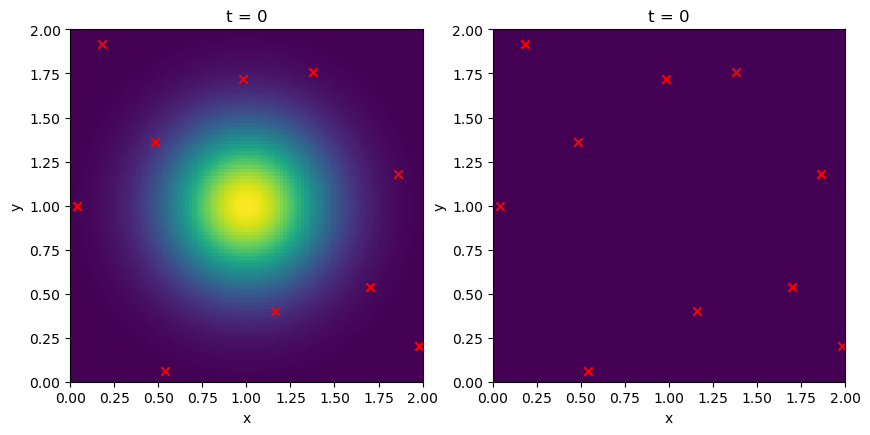

In [54]:
from matplotlib.animation import FuncAnimation
from scipy.stats import qmc
#create meshgrid for the plot
x = np.linspace(0, 2,101)
y = np.linspace(0, 2,101)
X, Y = np.meshgrid(x,y)

# reshape every row which is 10201 to 101x101
u_matrix = u_matrix.reshape(101,101,-1)
print(u_matrix.shape)
u_matrix = u_matrix[:,:,2:-2].copy()
f_matrix = f_matrix.reshape(101,101,-1)
n_training_points = 10
d = 2
engine = qmc.Sobol(d, seed=77)
sample = engine.random(n_training_points)
# sample is in [0,1]^d, so we need to scale it to the range of x and t
indices = sample * np.array([len(x), len(y)])
indices = np.floor(indices).astype(int)
x_train_u = x[indices[:, 0]]
t_train_u = y[indices[:, 1]]

u_train = np.array([u_matrix[i, j] for i, j in indices])
print(u_train.shape)





fig, ax = plt.subplots(1,2,figsize=(10,10))
ax = ax.flatten()
def frame(t_index):
    
    ax[0].clear()
    #ax.plot_surface(X, Y, u_matrix[:,t_index].reshape(101,101), cmap='viridis')
    ax[0].imshow(u_matrix[:,:,t_index], cmap='viridis', extent=[0,2,0,2])
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    #ax.set_zlabel('u')
    ax[0].set_title('t = ' + str(t_index))
    #plot the training points if they exist at the time step
    ax[0].scatter(x_train_u, t_train_u, color='red', marker='x', label='training points')

    ax[1].clear()
    #ax.plot_surface(X, Y, u_matrix[:,t_index].reshape(101,101), cmap='viridis')
    ax[1].imshow(f_matrix[:,:,t_index], cmap='viridis',extent=[0,2,0,2])
    ax[1].set_xlabel('x')
    ax[1].set_ylabel('y')
    #ax.set_zlabel('u')
    ax[1].set_title('t = ' + str(t_index))
    #plot the training points if they exist at the time step
    ax[1].scatter(x_train_u, t_train_u, color='red', marker='x', label='training points')
    return fig
# Create the animation
ani = FuncAnimation(fig, frame, frames=u_matrix.shape[2], repeat=False)

ani.save('test.mp4', writer='ffmpeg', fps=30)
#plt.show()

In [42]:
frame(200)

IndexError: index 200 is out of bounds for axis 1 with size 101